# RBI Banking Stress Analysis

#### Data Preparation & Table Structuring

##### Problem Statement: 
Early stress signal detection system using historical RBI banking datasets by analyzing NPA trends across different bank groups

India’s banking system stability is closely linked to Non-Performing Assets (NPAs). Sudden increases in NPAs often indicate systemic stress that impacts lending capacity, economic growth, and financial trust.

##### Dataset Source:
Data obtained from Reserve Bank of India (RBI) – Database on Indian Economy (DBIE) 
Link: https://data.rbi.org.in/DBIE/#/dbie/reports/Statistics/Financial%20Sector/Banking%20-%20Performance%20Indicators

Dataset used: 
Gross and Net NPAs of Scheduled Commercial Banks – Bank Group-Wise
(Home > Statistics > Financial Sector > Banking - Performance Indicators)

##### Dataset Overview:

The dataset contains yearly NPA-related indicators for six categories of banks
operating in India.

Time Period: 1996 – 2024

Frequency: Annual

Unit: ₹ Crores

In [1]:
# Load Raw RBI Dataset

import pandas as pd

file_path = r"../data/Gross and Net NPAs of Scheduled Commercial Banks - Bank Group-Wise.xlsx"

raw_df = pd.read_excel(file_path, header=None)

raw_df.head()

d:\Deepa\ML_Project\ML_Project_2\.myvenv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Gross and Net NPAs of Scheduled Commercial Ban...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,(₹ Crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Gross and Net NPAs of Scheduled Commercial Ban...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,(₹ Crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Making dataset ready for analysis

# Removing margins and complete blank rows 
raw_df = raw_df.drop(raw_df.columns[0], axis=1)

raw_df = raw_df.dropna(how='all')

# Removing Tilele and metadata rows(1st two rows)
raw_df = raw_df.iloc[2:].reset_index(drop=True)

# Removing Footer Notes
raw_df = raw_df[
    ~raw_df.iloc[:, 0].astype(str).str.contains("Notes", na=False)
]

In [4]:
raw_df.tail()

,1,2,3,4,5,6,7,8,9
162,2022-23,184808.07,177887.3876,8608.185942,4.657906,3.2,1622.429576,0.912054,0.6
163,2021-22,140002.94,135802.3508,6910.503068,4.93597,3.4,2724.559342,2.006268,1.3
164,2020-21,111589,108613,5971,5.4,3.7,2981,2.7,1.8
165,2019-20,91509,90554,1709,1.9,1.3,765,0.8,0.6
166,2018-19,62775,59461,1087,1.7,1.3,586,1,0.7


In [5]:
# There are multiple Tables for Bank Groups stacked vertically.

# Identifying rows containing Bank Group Names
bank_start_rows = raw_df[
    raw_df.iloc[:, 0].astype(str).str.contains("Banks", na=False)
].index.tolist()
bank_start_rows

[0, 33, 66, 90, 123, 156]

In [6]:
for i in bank_start_rows:
    print(i, "->", raw_df.iloc[i, 0])

0 -> Scheduled Commercial Banks
33 -> Public Sector Banks
66 -> Old Private Sector Banks
90 -> Private Sector Banks *
123 -> Foreign Banks In India
156 -> Small Finance Banks


Extract Bank Group Tables

In [7]:
# Adding end boundary for last table 
bank_start_rows.append(len(raw_df))
bank_start_rows

[0, 33, 66, 90, 123, 156, 167]

In [8]:
bank_tables = {}

for i in range(len(bank_start_rows) - 1):

    start = bank_start_rows[i]
    end = bank_start_rows[i + 1]

    bank_name = raw_df.iloc[start, 0]

    table_df = raw_df.iloc[start:end].reset_index(drop=True)

    bank_tables[bank_name] = table_df

bank_tables.keys()

dict_keys(['Scheduled Commercial Banks', 'Public Sector Banks', 'Old Private Sector Banks', 'Private Sector Banks *', 'Foreign Banks In India', 'Small Finance Banks'])

In [9]:
clean_tables = []

columns = [
    "Year",
    "Advances_Gross",
    "Advances_Net",
    "Gross_NPA_Amount",
    "Gross_NPA_pct_Gross_Adv",
    "Gross_NPA_pct_Total_Assets",
    "Net_NPA_Amount",
    "Net_NPA_pct_Net_Adv",
    "Net_NPA_pct_Total_Assets"
]

for bank_name, df in bank_tables.items():

    # Removing 5 header rows
    df_clean = df.iloc[5:].copy()
    df_clean.columns = columns

    # Adding bank type
    df_clean["Bank_Type"] = bank_name

    clean_tables.append(df_clean)

In [10]:
# Merging All Bank Tables
master_df = pd.concat(clean_tables, ignore_index=True)

In [11]:
master_df.head()

,Year,Advances_Gross,Advances_Net,Gross_NPA_Amount,Gross_NPA_pct_Gross_Adv,Gross_NPA_pct_Total_Assets,Net_NPA_Amount,Net_NPA_pct_Net_Adv,Net_NPA_pct_Total_Assets,Bank_Type
0,2023-24,17508589.83,17142339.56,480818.2938,2.746185,1.7,106732.3205,0.622624,0.4,Scheduled Commercial Banks
1,2022-23,14756637.36,14319352.43,571545.5407,3.873142,2.4,135319.7062,0.945013,0.6,Scheduled Commercial Banks
2,2021-22,12750005.88,12198767.37,743639.6871,5.832465,3.4,204230.9038,1.674193,0.9,Scheduled Commercial Banks
3,2020-21,11399608,10806381,835138,7.3,4.3,258050,2.4,1.3,Scheduled Commercial Banks
4,2019-20,10918918,10301897,899803,8.2,5,289370,2.8,1.6,Scheduled Commercial Banks


In [12]:
master_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        137 non-null    object
 1   Advances_Gross              135 non-null    object
 2   Advances_Net                135 non-null    object
 3   Gross_NPA_Amount            135 non-null    object
 4   Gross_NPA_pct_Gross_Adv     135 non-null    object
 5   Gross_NPA_pct_Total_Assets  135 non-null    object
 6   Net_NPA_Amount              135 non-null    object
 7   Net_NPA_pct_Net_Adv         135 non-null    object
 8   Net_NPA_pct_Total_Assets    135 non-null    object
 9   Bank_Type                   137 non-null    str   
dtypes: object(9), str(1)
memory usage: 10.8+ KB


#### Preparing Dataset for Analysis

In [13]:
master_df["Year"] = master_df["Year"].str.extract(r"(\d{4})").astype(int)

In [14]:
num_cols = master_df.columns.drop(["Year", "Bank_Type"])

In [15]:
for col in num_cols:
    master_df[col] = pd.to_numeric(master_df[col], errors="coerce")

In [16]:
master_df = master_df.dropna(subset=["Advances_Gross", "Gross_NPA_Amount"])

In [17]:
master_df = master_df.reset_index(drop=True)

In [18]:
master_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        135 non-null    int64  
 1   Advances_Gross              135 non-null    float64
 2   Advances_Net                135 non-null    float64
 3   Gross_NPA_Amount            135 non-null    float64
 4   Gross_NPA_pct_Gross_Adv     135 non-null    float64
 5   Gross_NPA_pct_Total_Assets  135 non-null    float64
 6   Net_NPA_Amount              135 non-null    float64
 7   Net_NPA_pct_Net_Adv         135 non-null    float64
 8   Net_NPA_pct_Total_Assets    135 non-null    float64
 9   Bank_Type                   135 non-null    str    
dtypes: float64(8), int64(1), str(1)
memory usage: 10.7 KB


The dataset has been cleaned and structured to enable meaningful time-series and comparative analysis.

Key Observations

- The dataset contains **135 observations**
- There are **6 distinct bank types**
- All numeric columns are correctly stored as int and float values
- No missing values are present
- The dataset is ready for exploratory data analysis

In [19]:
master_df['Bank_Type'].value_counts()

Bank_Type
Scheduled Commercial Banks    28
Public Sector Banks           28
Private Sector Banks *        28
Foreign Banks In India        28
Old Private Sector Banks      17
Small Finance Banks            6
Name: count, dtype: int64

##### Bank Categories Included
- Scheduled Commercial Banks  
- Public Sector Banks  
- Old Private Sector Banks  
- Private Sector Banks  
- Foreign Banks in India  
- Small Finance Banks 

In [20]:
master_df['Year'].min(), master_df['Year'].max()

(np.int64(1996), np.int64(2023))

Time Period (1196 - 2023)

The dataset spans multiple financial years, allowing for:
- Long-term trend analysis
- Identification of stress and recovery phases
- Cross-bank comparison over the same economic cycles

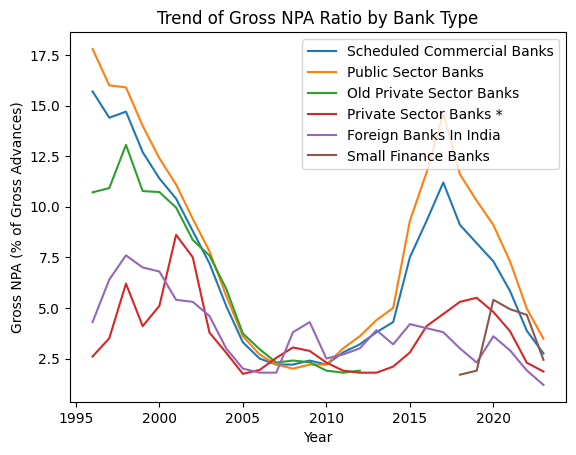

In [21]:
# Trend Analysis: Gross NPA Ratio
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
for bank in master_df['Bank_Type'].unique():
    subset = master_df[master_df['Bank_Type'] == bank]
    plt.plot(subset['Year'], subset['Gross_NPA_pct_Gross_Adv'], label=bank)

plt.xlabel("Year")
plt.ylabel("Gross NPA (% of Gross Advances)")
plt.title("Trend of Gross NPA Ratio by Bank Type")
plt.legend()
plt.show()

Interpretation : 

Public Sector Banks consistently exhibit higher Gross NPAs
Private and Foreign Banks maintain lower and more stable NPAs
Small Finance Banks, appearing in later years, show moderate NPAs

The extremely high Gross NPA ratios in the late 1990s indicate a structurally weak banking system, poor credit appraisal, limited disclosure norms, and absence of proactive asset quality monitoring.

The steady decline during the 2000s reflects the impact of banking reforms such as prudential norms, improved supervision, adoption of technology, and gradual strengthening of credit risk management practices.

The decline in Gross NPAs after 2019 suggests successful balance-sheet clean-up

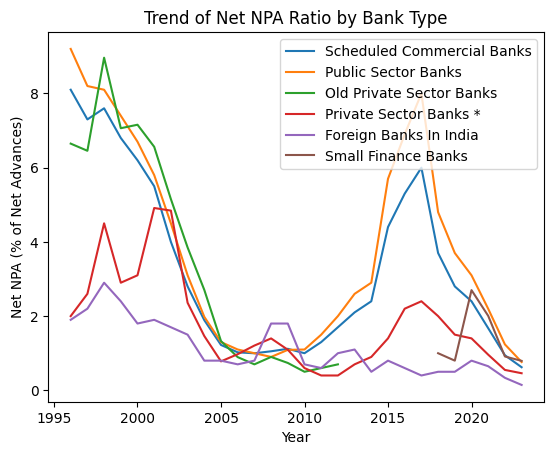

In [22]:
# Trend Analysis: Net NPA Ratio
plt.figure()
for bank in master_df['Bank_Type'].unique():
    subset = master_df[master_df['Bank_Type'] == bank]
    plt.plot(subset['Year'], subset['Net_NPA_pct_Net_Adv'], label=bank)

plt.xlabel("Year")
plt.ylabel("Net NPA (% of Net Advances)")
plt.title("Trend of Net NPA Ratio by Bank Type")
plt.legend()
plt.show()

Interpretation : 

The gap between Gross and Net NPA trends highlights the growing role of provisioning as a risk-absorption mechanism in Indian banks.

Very high Net NPAs in the 1990s indicate inadequate provisioning and limited buffers against credit losses.

The sharp decline in Net NPAs during the 2000s shows that reforms not only reduced bad loans but also strengthened banks’ ability to absorb losses.and

During the 2015–2018 stress period, Net NPAs rose far less sharply than Gross NPAs, indicating improved provisioning discipline.DeprecationWarning

Public Sector Banks continue to show the highest Net NPAs
New Private Sector and Foreign Banks maintain consistently low Net NPAs
Small Finance Banks show moderate Net NPAs

Indian banks have become progressively better at absorbing credit losses, reducing systemic vulnerability over time.

In [27]:
# Comparison of Gross vs Net NPAs

comparison_df = master_df.groupby('Bank_Type')[[
    'Gross_NPA_pct_Gross_Adv',
    'Net_NPA_pct_Net_Adv'
]].mean()

comparison_df

,Gross_NPA_pct_Gross_Adv,Net_NPA_pct_Net_Adv
Bank_Type,,
Foreign Banks In India,3.796437,1.129724
Old Private Sector Banks,6.315758,3.583401
Private Sector Banks *,3.621413,1.785831
Public Sector Banks,7.972908,3.816704
Scheduled Commercial Banks,6.941135,3.283848
Small Finance Banks,3.504369,1.368743
